# CROP PREDICTION

In [1]:
cd ~

/home/lenovo


In [2]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [3]:
#importing dataset

data = pd.read_csv('data2.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   object 
 1   P            2198 non-null   float64
 2   K            2199 non-null   float64
 3   temperature  2198 non-null   float64
 4   humidity     2199 non-null   object 
 5   ph           2200 non-null   float64
 6   rainfall     2199 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(5), object(3)
memory usage: 137.6+ KB


In [4]:
#looking for null values
data.isnull().sum()

N              0
P              2
K              1
temperature    2
humidity       1
ph             0
rainfall       1
label          0
dtype: int64

In [5]:
#handling null values by replacing them with the mean

nan_col = ['N','P','K','temperature','humidity','rainfall']
imputer = SimpleImputer(strategy='mean')
data[nan_col]=imputer.fit_transform(data[nan_col])

In [6]:
data.shape

(2200, 8)

In [7]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
data['label'].value_counts()

kidneybeans    100
blackgram      100
cotton         100
pigeonpeas     100
papaya         100
lentil         100
chickpea       100
orange         100
banana         100
grapes         100
maize          100
rice           100
watermelon     100
apple          100
coffee         100
pomegranate    100
mango          100
mungbean       100
coconut        100
jute           100
muskmelon      100
mothbeans      100
Name: label, dtype: int64

In [9]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.534334,53.334395,48.151887,25.617969,71.529203,6.469850,103.479412
std,36.908224,32.941369,50.647761,5.061726,22.208106,0.774205,54.953419
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.770662,60.280638,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.600938,80.473146,6.425675,94.986242
75%,84.000000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

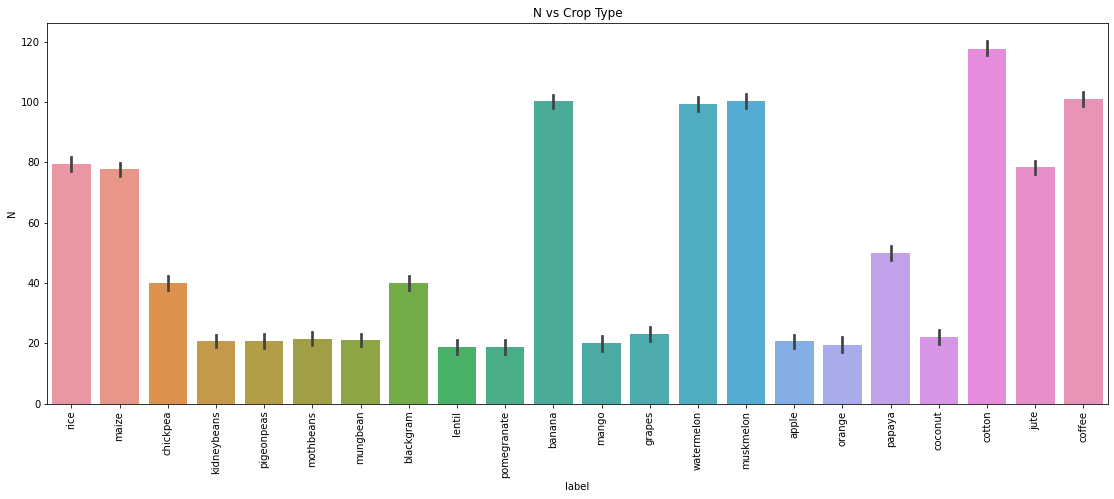

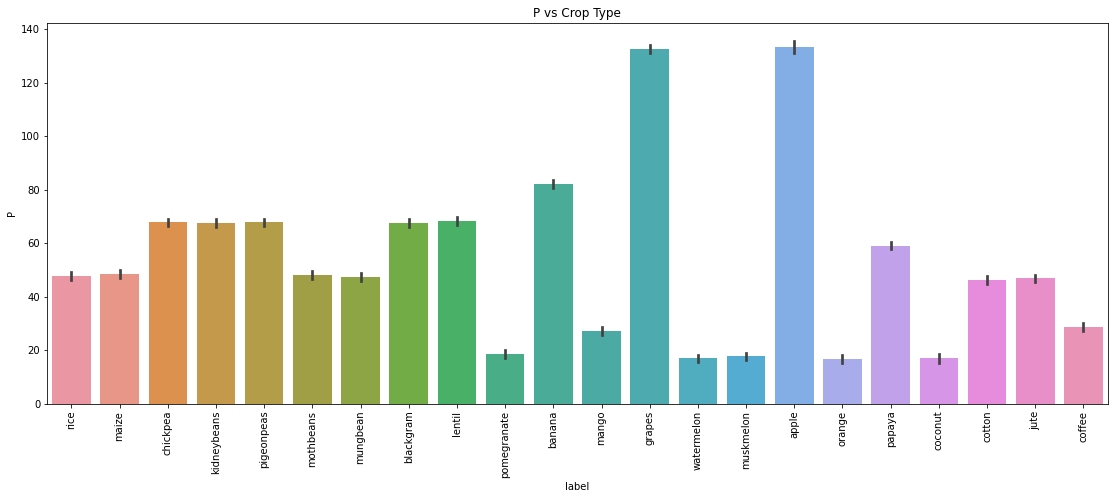

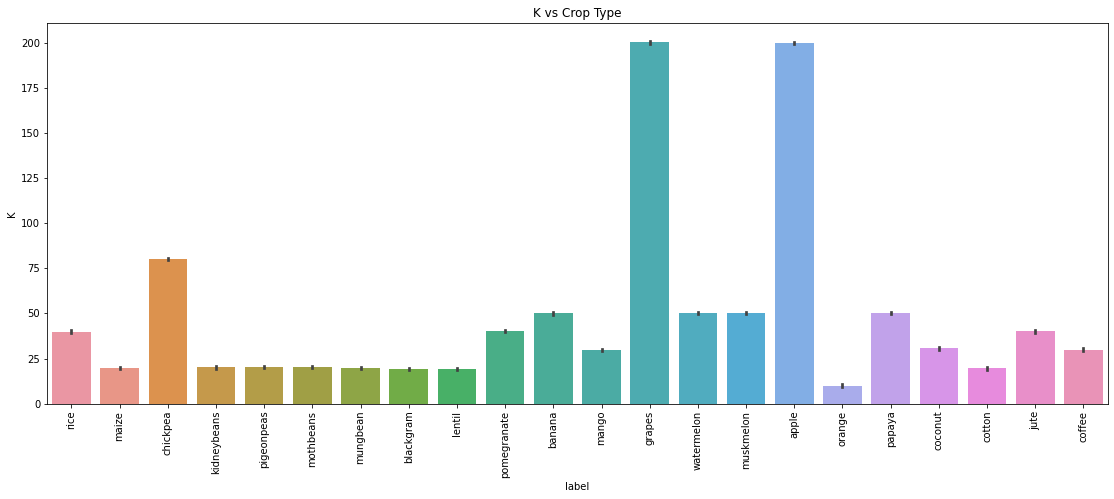

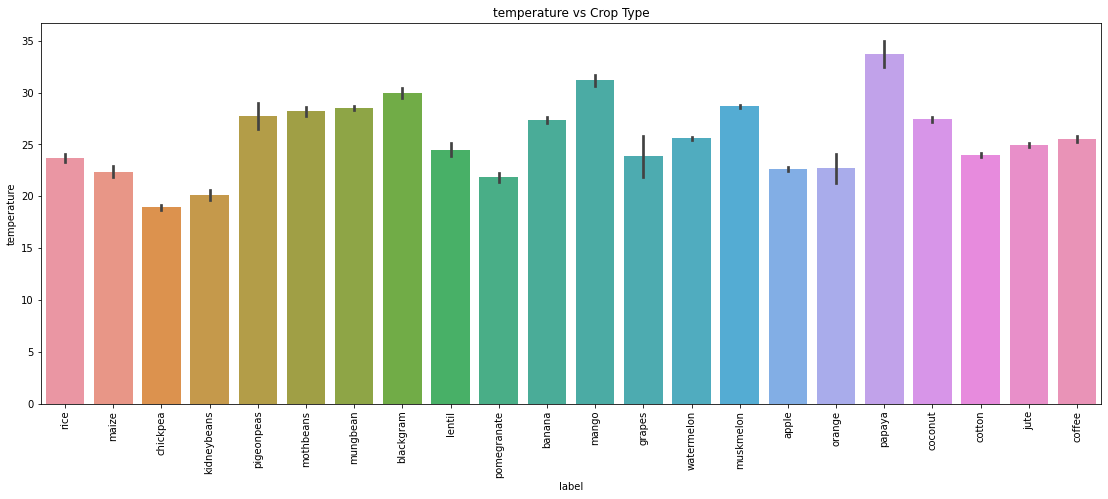

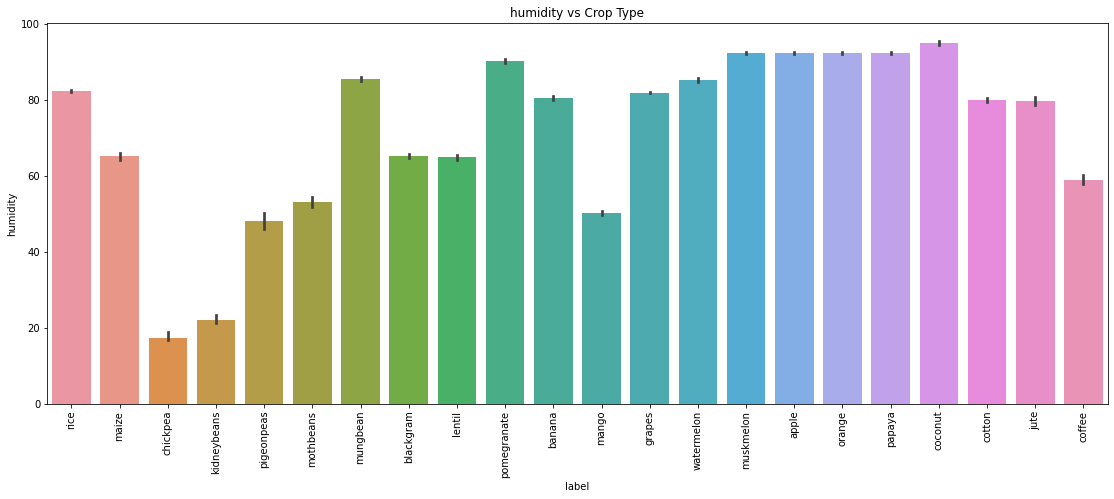

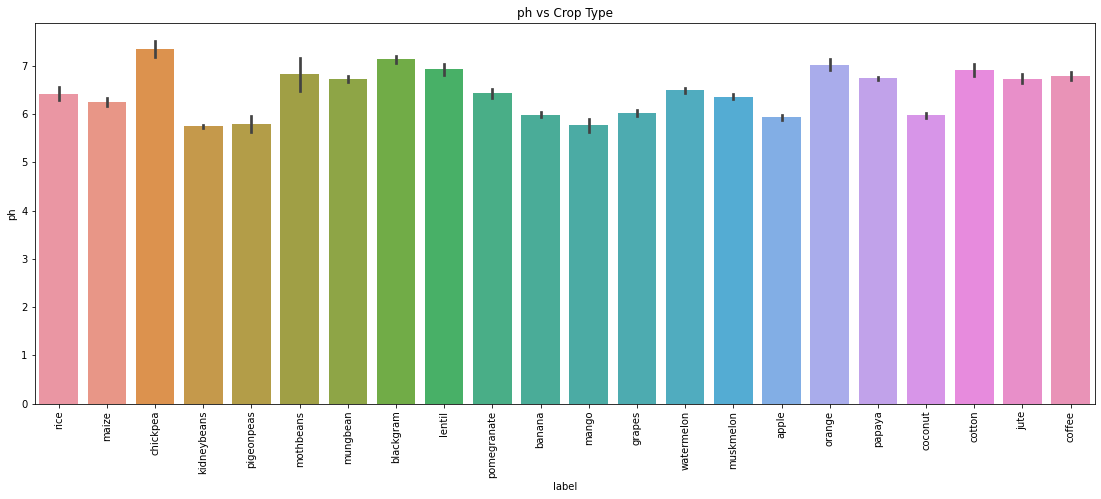

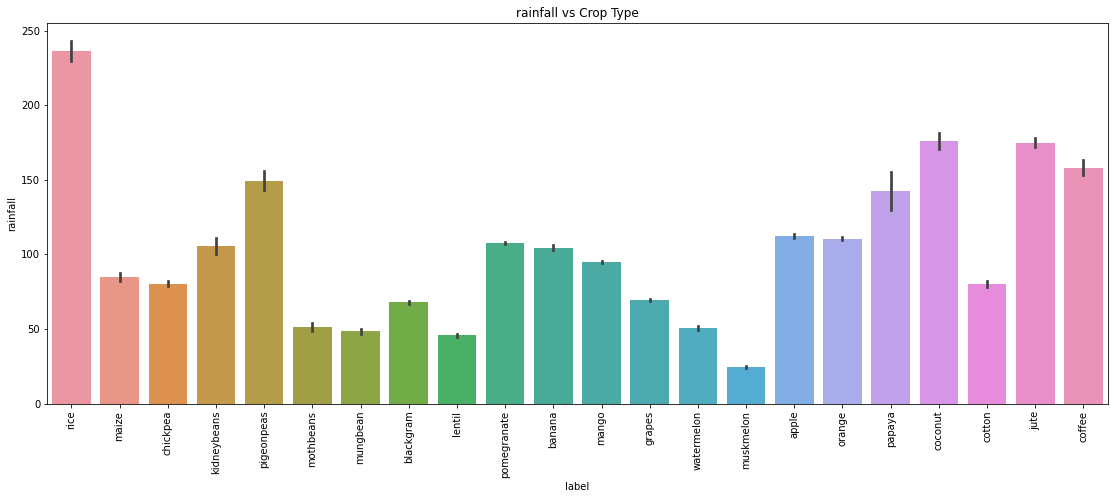

In [11]:
#visualizing
all_columns = data.columns[:-1]
for column in all_columns:
    plt.figure(figsize=(19,7))
    sns.barplot(x = "label", y = column, data = data)
    plt.xticks(rotation=90)
    plt.title(f"{column} vs Crop Type")
    plt.show()

<AxesSubplot:>

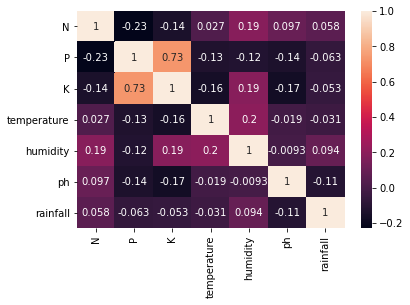

In [12]:
sns.heatmap(data.corr(),annot=True)

## **Splitting dataset**

In [13]:
data.shape

(2200, 8)

In [14]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
x_test

In [ ]:
y_test

## **Feature** **Scaling**

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [17]:
x_train

array([[ 2.25503714,  0.07683481, -0.59148671, ...,  0.56019082,
         0.2858316 , -0.58883131],
       [-0.58390501,  2.07317214,  2.90379741, ...,  0.43512997,
        -1.09896287, -0.55097728],
       [-0.69205518,  0.43980524, -0.57185028, ..., -0.32982746,
         0.83449682, -0.6520129 ],
       ...,
       [-0.42167974,  0.31881509, -0.65039599, ..., -0.36237331,
         0.0344722 , -0.61496072],
       [-0.31352956,  0.34906263, -0.49330457, ..., -0.10935754,
         1.5940195 , -1.12991974],
       [-0.98946817, -0.95158139, -0.76821456, ...,  0.88692002,
         0.09108612,  0.16164607]])

In [ ]:
x_test

In [18]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

## **Logistic** **Regression**

In [19]:
x_train

array([[ 2.25503714,  0.07683481, -0.59148671, ...,  0.56019082,
         0.2858316 , -0.58883131],
       [-0.58390501,  2.07317214,  2.90379741, ...,  0.43512997,
        -1.09896287, -0.55097728],
       [-0.69205518,  0.43980524, -0.57185028, ..., -0.32982746,
         0.83449682, -0.6520129 ],
       ...,
       [-0.42167974,  0.31881509, -0.65039599, ..., -0.36237331,
         0.0344722 , -0.61496072],
       [-0.31352956,  0.34906263, -0.49330457, ..., -0.10935754,
         1.5940195 , -1.12991974],
       [-0.98946817, -0.95158139, -0.76821456, ...,  0.88692002,
         0.09108612,  0.16164607]])

In [20]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [21]:
# predicting new result
print(classifier.predict(([[20,20,20,20,20,20,20]])))

['papaya']


In [22]:
#predicting test results
y_pred = classifier.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('\nAccuracy of Logistic Regression is')
x = accuracy_score(y_test,y_pred)
print(x)

model.append('Logistic Regression')
acc.append(x)

[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  1  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0 14  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  0  0 25  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

## **SVM**

In [ ]:
#Training the SVM model on the Training set

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

In [ ]:
print(classifier.predict(([[90,40,40,20,80,7,200]])))

In [ ]:
#predicting test results
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('\nAccuracy of SVM is')
x=accuracy_score(y_test,y_pred)
print(x)

model.append('SVM')
acc.append(x)

## **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [ ]:
print(classifier.predict(([[90,40,40,20,80,7,200]])))

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('\nAccuracy of Naive Bayes is')
x = accuracy_score(y_test,y_pred)

print(x)

model.append('Naive Bayes')
acc.append(x)

## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('\nAccuracy of Decision Tree is')
x = accuracy_score(y_test,y_pred)
print(x)

model.append('Decision Tree')
acc.append(x)

## **Accuracy comparision**

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')